# palettes

[![Project Status](http://www.repostatus.org/badges/latest/concept.svg)](http://www.repostatus.org/#concept)
[![ci](https://github.com/dirmeier/palettes/workflows/ci/badge.svg)](https://github.com/dirmeier/palettes/actions?query=workflow%3Aci)

## About 
 
This package contains some of my color palettes for usage in Python. One can choose between qualitative, diverging and sequential color palettes depending on the type of variable to be visualized 

## Installation

To install the latest GitHub release, just call the following on the command line:

```bash
pip install git+https://github.com/dirmeier/palettes@v0.1.0
```

## Usage

`palettes` works with both `matplotlib` or `seaborn`. You can either manually specify colors or provide matplotlib color maps. Below, we briefly demonstrate how to use the package.

In [1]:
import numpy as np
import numpy.random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import palettes
from palettes.plot import plot_palette

Set a custom theme for matplotlib:

In [2]:
palettes.set_theme()

For visualization we use the well-known diamonds data:

In [3]:
diamonds = sns.load_dataset("diamonds")

### Sequential colors 

Sequential colors are usually chosen for continuous variables. The sequential colors here revolve around the following three colors:

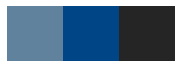

In [4]:
plot_palette(palettes.discrete_sequential_colors())

In the visualization above we use three discrete colors, but you can also choose more:

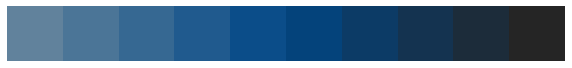

In [5]:
plot_palette(palettes.discrete_sequential_colors(10))

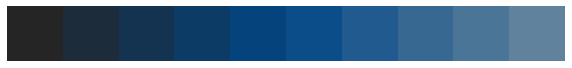

In [6]:
plot_palette(palettes.discrete_sequential_colors(10, True))

Usually for continuous variables, we want a continous scale though:

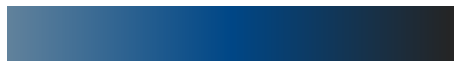

In [7]:
plot_palette(palettes.continuous_sequential_colors())

In a plot, we use the color scheme like this:

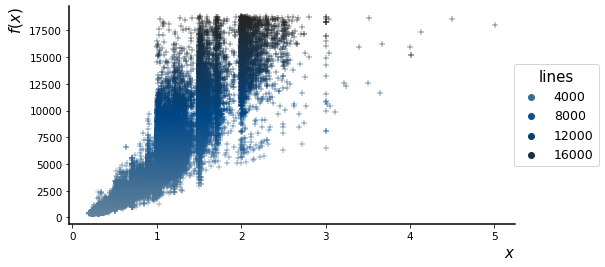

In [8]:
_, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(
    x="carat", y="price",
    hue="price",
    palette=palettes.continuous_sequential_colors(),
    data=diamonds, ax=ax,
    marker="+"
)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.legend(title="lines", bbox_to_anchor=(1.2, 0.5))
plt.show()

### Diverging colors 

Diverging colors are usually chosen for continuous variables that can deviate in one of two directions relative to some midpoint. The diverging colors here revolve around the following four colors:

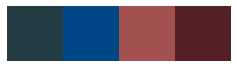

In [9]:
plot_palette(palettes.discrete_diverging_colors())

As above, you can specify more colors, too, and reverse them:

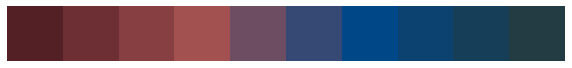

In [10]:
plot_palette(palettes.discrete_diverging_colors(10, True))

Since the visualized variable is usually continuous again, you want a continous scale again:

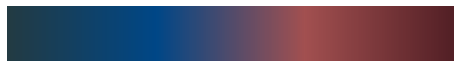

In [11]:
plot_palette(palettes.continuous_diverging_colors())

For plotting, we use the palette as before. In this case the midpoint would be if a diamond has 3 carats.

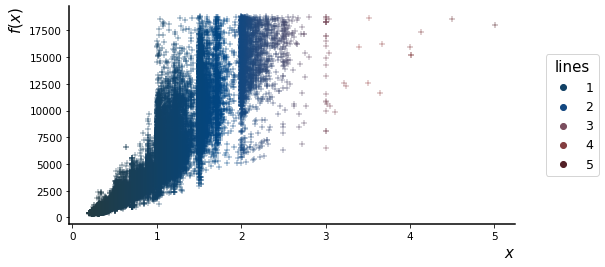

In [12]:
_, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(
    x="carat", y="price",
    hue="carat",
    palette=palettes.continuous_diverging_colors(),
    data=diamonds, ax=ax,
    marker="+"
)
ax.legend(title="lines", bbox_to_anchor=(1.2, 0.5))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

### Qualitative colors 

Qualitative colors are usually chosen for categorical variables. The qualitative colors palette in this package has the following colors:

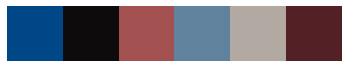

In [13]:
plot_palette(palettes.discrete_qualitative_colors())

In [14]:
def sqeuclidean_cdist(X):
    X = X.reshape(-1, 1)    
    X2 = np.sum(np.square(X), 1)    
    dist = -2.0 * np.dot(X, np.transpose(X)) + (
        np.reshape(X2, (-1, 1)) + np.reshape(X2, (1, -1))
    )
    return  np.exp(-0.5 * np.clip(dist, 0.0, np.inf))

X = np.linspace(0, 10, 100)
K = sqeuclidean_cdist(X)

You can, for instance, use it like this:

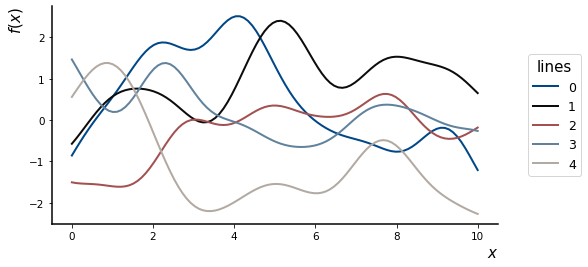

In [15]:
cols = palettes.discrete_qualitative_colors()

_, ax = plt.subplots(figsize=(8, 4))
for i in range(5):
    f = numpy.random.multivariate_normal(np.zeros(X.shape[0]), K) 
    plt.plot(X, f, color=cols[i], linewidth=2, label=i)
ax.legend(title="lines", bbox_to_anchor=(1.2, 0.5))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

If you need less colors, manually specificying the colors to avoid a too colorful figure is usually a good idea. For instance, for plots with three lines you could use these colors:

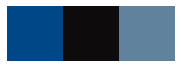

In [16]:
plot_palette(np.array(cols)[[0, 1, 3]])

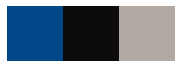

In [17]:
plot_palette(np.array(cols)[[0, 1, 4]])

In that case we merely need to specify the indexes of the colors:

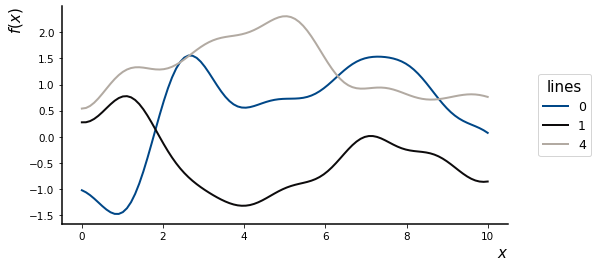

In [18]:
idxs = 0, 1, 4
_, ax = plt.subplots(figsize=(8, 4))
for i in idxs:
    f = numpy.random.multivariate_normal(np.zeros(X.shape[0]), K) 
    plt.plot(X, f, color=cols[i], linewidth=2, label=i)
ax.legend(title="lines", bbox_to_anchor=(1.2, 0.5))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

The palette has a maximum of 6 colors. I've chosen to use only 6, because humans are usually not good at congitively processing more then 4-5 colors in a plot, so 6 is a hard maximum. 

For qualitative variables with more than 6 levels, I usually prefer a light/transarent blue sequential scale, since one cannot distinguish the colors effectively any more anyways. Alternatively one can use a greyscale for the variables, and highlight some few with colors. 

See the plot below as an example of a blue sequential scale. Note that in the plot below, we don't use a legend, cause we don't want to emphasize/highlight the separate lines, but rather show the general trend.

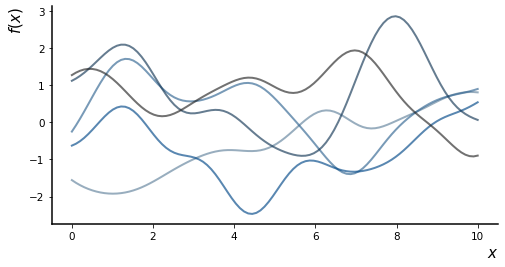

In [19]:
cols = palettes.discrete_sequential_colors(5)

_, ax = plt.subplots(figsize=(8, 4))
for i in range(5):
    f = numpy.random.multivariate_normal(np.zeros(X.shape[0]), K) 
    plt.plot(X, f, color=cols[i], linewidth=2, alpha=.65)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

A grey color scale to do the same as above can be created from seaborn:

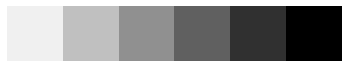

In [20]:
plot_palette(sns.color_palette("light:black", as_cmap=False))

If we want to put emphasis on a *single* line, we plot all *other* lines, for instance, in grey, and highlight the one we are interest in afterwards.

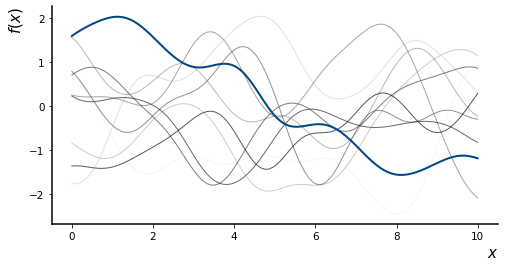

In [21]:
cols = sns.color_palette("light:black", as_cmap=False, n_colors=9)
highlight_color = palettes.discrete_sequential_colors(3)[1]

_, ax = plt.subplots(figsize=(8, 4))
for i in range(9):
    f = numpy.random.multivariate_normal(np.zeros(X.shape[0]), K) 
    plt.plot(X, f, color=cols[i], linewidth=1, alpha=.65)
f = numpy.random.multivariate_normal(np.zeros(X.shape[0]), K) 
plt.plot(X, f, color=highlight_color, linewidth=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

## Author

Simon Dirmeier <a href="mailto:simon.dirmeier @ web.de">simon.dirmeier @ web.de</a>